# Classification


## importing packages



In [41]:
import pandas as pd
import numpy as np
from datetime import datetime, date
from datetime import timedelta
import matplotlib.pyplot as plt
import itertools

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

# Preprocessing:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

# crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# evaluation:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

## Set up functions

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Data Preparation and Split

In [13]:
df = pd.read_csv("../data/processed/all_features_with_further_preprocessing.csv")
df=df.drop(columns=['Unnamed: 0'])

# remove last_year:
last_date = date(2003, 5, 1)
delta = timedelta(days=365)
df['date_added_graph']= pd.to_datetime(df['date_added_graph']).dt.date
df = df[df['date_added_graph']<=last_date - delta]

# discarding irrelevant variables
df=df.drop(columns=['submitter', 'submission_date', 'title', 'authors','comments','report_no',
                    'journal_ref','abstract','submitter_email','submitter_name','first_submission_datetime',
                    'first_submission_date', 'format', 'submitter_active', 'submitter_counts', 'journal_popularity',
                    'journal_counts','datedelta','submitter_details'])

df_train = df[df['date_added_graph']<date(2002, 1, 1)]
df_train=df_train.drop(columns=['date_added_graph'])
df_train=df_train.reset_index(drop=True)
df_train_features=df_train.drop(columns=['first_365_days','label','label_name']) 
df_train_label_class=df_train['label']
df_train_label_numeric=df_train['first_365_days']

df_test = df[df['date_added_graph']>=date(2002, 1, 1)]
df_test=df_test.drop(columns=['date_added_graph'])
df_test=df_test.reset_index(drop=True)
df_test_features=df_test.drop(columns=['first_365_days','label','label_name']) 
df_test_label_class=df_test['label']
df_test_label_numeric=df_test['first_365_days']
df_test_label_numeric



0      20.0
1       0.0
2      22.0
3       2.0
4       2.0
       ... 
980     3.0
981    15.0
982     3.0
983     0.0
984    20.0
Name: first_365_days, Length: 985, dtype: float64

In [19]:
df_test_features

,paper_id,indegrees_of_cited_papers_sum,indegrees_of_cited_papers_avg,recency_of_cited_papers_avg,max_time_difference_bw_cited_papers,outdegree,outdegrees_of_cited_papers_sum,outdegrees_of_cited_papers_avg,is_revised,times_revised,num_of_pages,format_latex,format_revtex,format_harvmac,format_plaintex,citations_till_date
0,112258,5069,253.450000,1337.050000,3492.0,20,412,20.600000,1,2,13.0,0,0,0,0,5124
1,112257,44,4.888889,1921.222222,1507.0,9,46,5.111111,1,1,14.0,0,1,0,0,0
2,112253,3060,92.727273,589.939394,3574.0,33,981,29.727273,1,1,15.0,1,0,0,0,0
3,112259,1046,87.166667,1037.083333,1766.0,12,479,39.916667,0,0,0.0,0,0,0,0,0
4,112254,4495,224.750000,998.300000,1958.0,20,1321,66.050000,1,1,5.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,204122,3523,167.761905,1122.952381,3209.0,21,253,12.047619,1,1,24.0,0,0,0,0,1
981,204062,103,14.714286,574.285714,2224.0,7,146,20.857143,0,0,14.0,1,0,0,0,10
982,202037,1335,60.681818,450.863636,986.0,22,567,25.772727,0,0,20.0,0,0,0,0,10
983,203022,16,4.000000,205.500000,253.0,4,17,4.250000,0,0,14.0,0,0,0,0,1


# Multilayer Perceptron Classifier

In [34]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class_weight = {0: 5044, 1: 9509, 2: 1103, 3: 840}
gridsearch_parameters = [{'classification': (MLPClassifier(),),#class_weight=class_weight),),
                        'classification__hidden_layer_sizes': ((2),(3),(4),(5),(6),(7))}]
pipeline = Pipeline([("scaler", StandardScaler()), ("feature_selection", SelectKBest(k="all")), ("classification", MLPClassifier(solver='lbfgs', random_state=1))])



grid_search_estimator = GridSearchCV(pipeline, gridsearch_parameters, scoring='f1_macro',cv=cv, return_train_score=True)

grid_search_estimator.fit(df_train_features, df_train_label_class)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(k='all')),
                                       ('classification',
                                        MLPClassifier(random_state=1,
                                                      solver='lbfgs'))]),
             param_grid=[{'classification': (MLPClassifier(hidden_layer_sizes=6),),
                          'classification__hidden_layer_sizes': (2, 3, 4, 5, 6,
                                                                 7)}],
             return_train_score=True, scoring='f1_macro')

Best parameters: 
classification : MLPClassifier(hidden_layer_sizes=6)
classification__hidden_layer_sizes : 6

Mean Train Scores:
 [0.3085189  0.37372918 0.36928915 0.37749665 0.3840754  0.38114473]
Mean Test Scores:
 [0.31005454 0.36791566 0.36465415 0.37534193 0.37955522 0.37259276]

              precision    recall  f1-score   support

         0.0       0.59      0.29      0.39       220
         1.0       0.66      0.92      0.77       607
         2.0       0.00      0.00      0.00        74
         3.0       0.56      0.18      0.27        84

    accuracy                           0.65       985
   macro avg       0.45      0.35      0.36       985
weighted avg       0.59      0.65      0.58       985



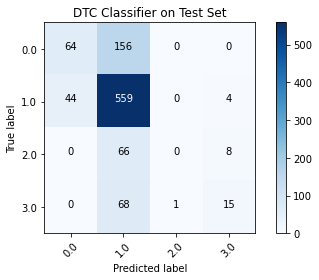

In [35]:
print("Best parameters: ")
for a,b in grid_search_estimator.best_params_.items():
    print(a , ":", b)
print()

print("Mean Train Scores:\n", grid_search_estimator.cv_results_['mean_train_score'])
print("Mean Test Scores:\n", grid_search_estimator.cv_results_['mean_test_score'])
print()

prediction = grid_search_estimator.predict(df_test_features)
cm = confusion_matrix(df_test_label_class, prediction)
plot_confusion_matrix(cm, classes = unique_labels(df_test_label_class), title = "DTC Classifier on Test Set")
print(classification_report(df_test_label_class, prediction))

# Naive Bayes Classifier

In [38]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

class_weight = {0: 5044, 1: 9509, 2: 1103, 3: 840}
gridsearch_parameters = [{'classification': (GaussianNB(),),#class_weight=class_weight),),
                        }]
pipeline = Pipeline([("scaler", StandardScaler()), ("feature_selection", SelectKBest(k="all")), ("classification", GaussianNB())])



grid_search_estimator = GridSearchCV(pipeline, gridsearch_parameters, scoring='f1_macro',cv=cv, return_train_score=True)

grid_search_estimator.fit(df_train_features, df_train_label_class)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(k='all')),
                                       ('classification', GaussianNB())]),
             param_grid=[{'classification': (GaussianNB(),)}],
             return_train_score=True, scoring='f1_macro')

Best parameters: 
classification : GaussianNB()

Mean Train Scores:
 [0.34989399]
Mean Test Scores:
 [0.34883262]

              precision    recall  f1-score   support

         0.0       0.42      0.62      0.50       220
         1.0       0.70      0.45      0.55       607
         2.0       0.13      0.32      0.19        74
         3.0       0.30      0.30      0.30        84

    accuracy                           0.46       985
   macro avg       0.39      0.42      0.38       985
weighted avg       0.56      0.46      0.49       985



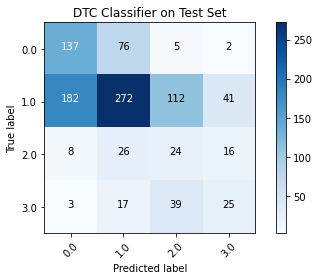

In [39]:
print("Best parameters: ")
for a,b in grid_search_estimator.best_params_.items():
    print(a , ":", b)
print()

print("Mean Train Scores:\n", grid_search_estimator.cv_results_['mean_train_score'])
print("Mean Test Scores:\n", grid_search_estimator.cv_results_['mean_test_score'])
print()

prediction = grid_search_estimator.predict(df_test_features)
cm = confusion_matrix(df_test_label_class, prediction)
plot_confusion_matrix(cm, classes = unique_labels(df_test_label_class), title = "DTC Classifier on Test Set")
print(classification_report(df_test_label_class, prediction))